# Research analysis of apartment advertisements

As **data**, there is an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. **The purpose** of this project is to study the main parameters of apartments affecting their price. 

The analysis contains **several stages**:
- data preprocessing and preparation of variables for analysis;
- study of the main parameters' distributions which can potentially affect the market price of apartments;
- analysis of the relationship between various parameters of apartments and their prices;
- research of the apartments' market pricein the settlements with the largest number of apartment sales advertisements.

**Description of variables:**
- 'airports_nearest' - distance to the nearest airport in meters (m)
- 'balcony' - number of balconies
- 'ceiling_height' - ceiling height (m)
- 'cityCenters_nearest' - distance to the city center (m)
- 'days_exposition' - how many days the ad was posted (from publication to withdrawal)
- 'first_day_exposition' - publication date
- 'floor' - floor
- 'floors_total' - total floors in the house
- 'is_apartment' - apartments (boolean type)
- 'kitchen_area' - kitchen area in square meters (m²)
- 'last_price' - price at the time of unpublishing
- 'living_area' - living area in square meters (m²)
- 'locality_name' - name of the settlement
- 'open_plan' - free plan (boolean)
- 'parks_around3000' - the number of parks within a 3 km radius
- 'parks_nearest' - distance to the nearest park (m)
- 'ponds_around3000' - the number of reservoirs within a radius of 3 km
- 'ponds_nearest' - distance to the nearest body of water (m)
- 'rooms' - number of rooms
- 'studio' - studio apartment (boolean type)
- 'total_area' - apartment area in square meters (m²)
- 'total_images' - the number of apartment photos in the ad

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Removing-rare-and-outliers'-values" data-toc-modified-id="Removing-rare-and-outliers'-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Removing rare and outliers' values</a></span></li><li><span><a href="#What-factors-mostly-affect-the-price-of-an-apartment?" data-toc-modified-id="What-factors-mostly-affect-the-price-of-an-apartment?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>What factors mostly affect the price of an apartment?</a></span></li><li><span><a href="#Research-of-settlements-with-the-largest-number-of-ads" data-toc-modified-id="Research-of-settlements-with-the-largest-number-of-ads-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Research of settlements with the largest number of ads</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Data Preprocessing

**Import necessary libraries and data:**

In [12]:
# library
import pandas as pd
import warnings

# mute notifications
warnings.filterwarnings('ignore')

# importing dataset
data = pd.read_csv('real_estate_data_en.csv')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Saint Petersburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Saint Petersburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Petersburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Saint Petersburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Explore and prepare a dataframe for further analysis:**

In [13]:
print(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In total, the dataset contains 22 variables and 23699 observations.

Among them are variables with four data types:

- 14 variables of float64 type: 'last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'
- 3 variables of int64 type: 'total_images', 'rooms', 'floor')
- 3 variables of object type: 'first_day_exposition', 'is_apartment', 'locality_name'
- 2 variables of bool type: 'studio', 'open_plan'

**Checking data for missing values:**

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

As can be seen, there are many variables with missing values in the dataset. Let's deal with all of them in order:

**'balcony' variable:**

In [15]:
data['balcony'].isna().sum()

11519

This variable contains 11519 missing values, which is almost half of the entire sample, so they cannot be simply removed. Based on the essence of the variable - whether there is a balcony in the apartment or not - it is possible to hypothesize that the missing values = the absence of balconies in the apartments. Therefore, we replace all the missing values of this variable with 0: 

In [16]:
data['balcony'] = data['balcony'].fillna('0')
data['balcony'].isna().sum()

0

**'ceiling_height' variable**

In [17]:
data['ceiling_height'].isna().sum()

9195

The variable reflecting the height of the ceilings has 9 thousand missing values, which is 0.3 shares of all data in the sample. Therefore, missing values cannot be removed. Let's look at the minimum, maximum, average and median ceiling heights according to the data in the table:

In [18]:
ceiling_max = data['ceiling_height'].max()
ceiling_min = data['ceiling_height'].min()
ceiling_mean = data['ceiling_height'].mean()
ceiling_median = data['ceiling_height'].median()
print('Maximum ceiling height:', ceiling_max)
print('Minimum ceiling height:', ceiling_min)
print('Average ceiling height:', ceiling_mean)
print('Median ceiling height:', ceiling_median)

Maximum ceiling height: 100.0
Minimum ceiling height: 1.0
Average ceiling height: 2.7714988968559835
Median ceiling height: 2.65


As can be seen, the mean and median are not very different. Therefore, to fill in the missing values, I suggest using the median value:

In [19]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)
data['ceiling_height'].isna().sum()

0

**'is_apartment' variable**

In [20]:
data['is_apartment'].isna().sum()

20924

21 thousand missing values in a variable reflecting the type of property - apartments or not. It would be logical to assume that the missing values reflect cases when the property type is a flat (not an apartment). Therefore, missing values can be replaced with False.

In [21]:
data['is_apartment'] = data['is_apartment'].fillna('False')
data['is_apartment'].isna().sum()

0

**'kitchen_area' variable**

In [22]:
data['kitchen_area'].isna().sum()

2278

Almost 10% of the variable are missing values. Let's look at the available values for this variable:

In [23]:
kitchen_max = data['kitchen_area'].max()
kitchen_min = data['kitchen_area'].min()
kitchen_mean = data['kitchen_area'].mean()
kitchen_median = data['kitchen_area'].median()
print('Maximum kitchen area:', kitchen_max)
print('Minimum kitchen area:', kitchen_min)
print('Average kitchen area:', kitchen_mean)
print('Median kitchen area:', kitchen_median)

Maximum kitchen area: 112.0
Minimum kitchen area: 1.3
Average kitchen area: 10.569807198543522
Median kitchen area: 9.1


The minimum and maximum values are very different. Also, the median value is very different from the mean. Therefore, I propose to divide the apartments into several groups depending on their area. First, let's calculate the thresholds:

In [24]:
pd.qcut(data['total_area'], 4).value_counts()

(11.999, 40.0]    6042
(69.9, 900.0]     5921
(40.0, 52.0]      5913
(52.0, 69.9]      5823
Name: total_area, dtype: int64

Let's write a function that divides apartments by their size in accordance with the specified threshold values:

In [25]:
def area_group(area):    
    if 11.999 <= area <= 40.0:
        return '12 - 40 m.'
    if 40.0 <= area <= 52.0:
        return '40 - 52 m.'
    if 52.0 <= area <= 69.9:
        return '52 - 70 m.'
    return '70 - 900 m.'

Let's apply this function and create a new variable 'total_area_new' for the obtained indicators:

In [26]:
data['total_area_new'] = data['total_area'].apply(area_group)

In [27]:
data['total_area_new'].value_counts()

12 - 40 m.     6042
70 - 900 m.    5921
40 - 52 m.     5913
52 - 70 m.     5823
Name: total_area_new, dtype: int64

Let's look at the median value of the size of the kitchen in apartments, depending on their area:

In [28]:
kitchen_median = data.groupby('total_area_new')['kitchen_area'].median()
print(kitchen_median)

total_area_new
12 - 40 m.      8.25
40 - 52 m.      8.00
52 - 70 m.      9.00
70 - 900 m.    13.00
Name: kitchen_area, dtype: float64


These values can be used to fill in missing values in a variable representing kitchen area by apartment size:

In [29]:
data['kitchen_area'] = data.groupby('total_area_new')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

In [30]:
data['kitchen_area'].isna().sum()

0

**'living_area' variable**

In [31]:
data['living_area'].isna().sum()

1903

The number of missing values is large enough. We can do the same manipulation as with the kitchen area:

In [32]:
living_max = data['living_area'].max()
living_min = data['living_area'].min()
living_mean = data['living_area'].mean()
living_median = data['living_area'].median()
print('Maximal Living Area:', living_max)
print('Minimal Living Area:', living_min)
print('Average Living Area:', living_mean)
print('Median Living Area:', living_median)

Maximal Living Area: 409.7
Minimal Living Area: 2.0
Average Living Area: 34.45785242760111
Median Living Area: 30.0


Previously, we have already divided apartments into 4 groups, depending on their area. Let's look at the median living area for each of the groups:

In [33]:
living_median = data.groupby('total_area_new')['living_area'].median()
print(living_median)

total_area_new
12 - 40 m.     17.2
40 - 52 m.     27.4
52 - 70 m.     35.5
70 - 900 m.    51.3
Name: living_area, dtype: float64


These values can be used in order to fill in the missing values of the living area depending on the total size of the apartment:

In [34]:
data['living_area'] = data.groupby('total_area_new')['living_area'].apply(lambda x: x.fillna(x.median()))


In [35]:
data['living_area'].isna().sum()

0

**distance and location related variables**:

In [36]:
data['airports_nearest'].isna().sum()

5542

Again, there are a lot of missing values. In this case, the average distance to the airport can be calculated by grouping the data according to districts. But, unfortunately, in the dataset there is only information on the locality, reflected in the 'locality_name' variable, in which St. Petersburg is one large group, which is completely unrepresentative. Therefore, I propose to simply leave these values blank.

The same logic applies to variables reflecting the presence of parks and ponds, as well as the distance to the center, namely, to the following variables:
- 'CityCenteres_nearest';
- 'parks_around3000';
- 'parks_nearest';
- 'ponds_around3000';
- 'ponds_nearest'.

It is impossible to come up with any viable hypothesis for the variables tested above, so I propose to simply leave the values missing and then inform the customer about them.

**'days_exposition' variable**

In [37]:
data['days_exposition'].isna().sum()

3181

Given the essence of the variable - how many days an ad was posted (from publication to withdrawal) - it can be assumed that 3181 ads might not have been withdrawn from publication at the time the data was uploaded. Therefore, these values should be left blank.

**'floors_total' variable**

In [38]:
data['floors_total'].isna().sum()

86

Given the relatively small percentage of missing values: 0.3%, I suggest simply removing these lines:

In [39]:
data.dropna(subset = ['floors_total'], inplace = True)
data['floors_total'].isna().sum()

0

**'locality_name' variable**

In [40]:
data['locality_name'].isna().sum()

48

Again, there is a small amount of missing values that can be simply removed from the dataset:

In [41]:
data.dropna(subset = ['locality_name'], inplace = True)
data['locality_name'].isna().sum()

0

Thus, at this stage, all the missing values were processed, many of which were filled in.

**Changing data types**

For subsequent manipulations with data, it is needed to change the types of some variables:
1. The variables 'floors_total' and 'balcony' must be changed to integers:

In [42]:
data[['floors_total', 'balcony']] = data[['floors_total', 'balcony']].astype('int')

2. The variable is_apartment must be changed to boolean type, since it accepts only two values:

In [43]:
data['is_apartment'] = data['is_apartment'].astype('bool')

3. Let's make the variable 'total_area' of float type:

In [44]:
data['total_area'] = data['total_area'].astype('float')

Checking the results of variable's types fixing:

In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Adding new variables for further analysis**

**Price per square meter**

In [46]:
data['price_per_meter'] = data['last_price'] / data['total_area']
print(data['price_per_meter'].head(5))

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_per_meter, dtype: float64


**Day of the week, month and year of the ad's publication**

In [47]:
# date
data['datetime'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
# weekday
data['weekday'] = data['datetime'].dt.weekday
# month
data['month'] = data['datetime'].dt.month
#year
data['year'] = data['datetime'].dt.year

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_new,price_per_meter,datetime,weekday,month,year
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,70 - 900 m.,120370.370370,2019-03-07,3,3,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,True,...,NaN,0.0,NaN,81.0,40 - 52 m.,82920.792079,2018-12-04,1,12,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,True,...,90.0,2.0,574.0,558.0,52 - 70 m.,92785.714286,2015-08-20,3,8,2015
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,51.3,9,True,...,84.0,3.0,234.0,424.0,70 - 900 m.,408176.100629,2015-07-24,4,7,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,70 - 900 m.,100000.000000,2018-06-19,1,6,2018


**Floor of the apartment:**
- first
- last
- other

In [48]:
# function for separating apartments based on the floor
def floor_group(row):
    last_floor = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'first'
    if floor == last_floor:
        return 'last'
    return 'other'

In [49]:
# applying function to dataset for making new variable 'floor_group'
data['floor_group'] = data.apply(floor_group, axis = 1)
print(data['floor_group'].head(5))

0    other
1    first
2    other
3    other
4    other
Name: floor_group, dtype: object


**The ratio of living area to total area, as well as the ratio of kitchen area to total.**

In [50]:
data['living_total'] = data['living_area'] / data['total_area']
print(data['living_total'].head(5))

0    0.472222
1    0.460396
2    0.612500
3    0.322642
4    0.320000
Name: living_total, dtype: float64


In [51]:
data['kitchen_total'] = data['kitchen_area'] / data['total_area']
print(data['kitchen_total'].head(5))

0    0.231481
1    0.272277
2    0.148214
3    0.081761
4    0.410000
Name: kitchen_total, dtype: float64


## Exploratory data analysis

**Exploring the distribution of main parameters:**
- total area;
- price;
- rooms number;
- ceiling height.

**Total Area**

In [52]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'Total Area Distribution'}, ylabel='Frequency'>

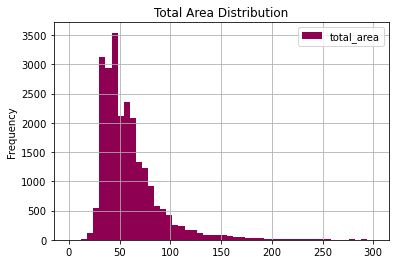

In [53]:
data.plot(y = 'total_area', kind='hist', bins=50, range=(0, 300), title='Total Area Distribution', grid = True, colormap='PiYG')

As can be seen from the histogram, the distribution is not entirely "normal", but overall there is data to the left and right of the peak. The most common apartment area is approximately 45-50 square meters. The minimum value is 12 square meters and the maximum is 900. 

**Price**

In [54]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Price Distribution'}, ylabel='Frequency'>

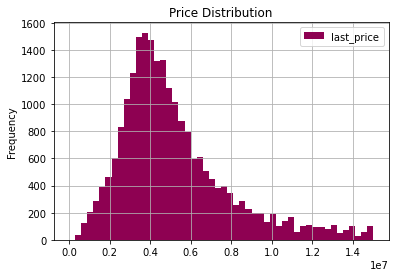

In [55]:
data.plot(y = 'last_price', kind = 'hist', bins=50, range = (0,15000000), title = 'Price Distribution', grid = True, colormap='PiYG')

As for the variable with the price of apartments, it takes on very different meanings. The minimum cost is 12190 RUB, and the maximum is 763000000 RUB. Judging by the histogram, the data have a normal distribution, while the "right" tail of the maximum values is very long. The peak value on the chart is at the level of 4-5 million RUB.

**Rooms Number**

In [56]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Rooms Number Distribution'}, ylabel='Frequency'>

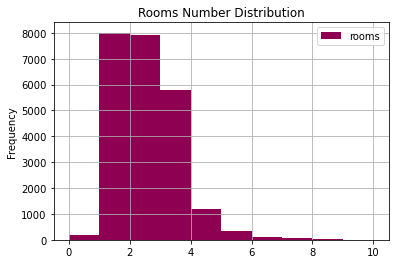

In [57]:
data.plot(y = 'rooms', kind = 'hist', bins=10, range = (0,10), title = 'Rooms Number Distribution', grid = True, colormap='PiYG')

The smallest number of rooms in the dataset is 0, and the largest is 19. As can be seen from the graph, there is a large peak in the interval of 1-4 rooms, and then the number of apartments with more than 4 rooms decreases.

**Ceiling Height**

In [58]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Ceiling Height Distribution'}, ylabel='Frequency'>

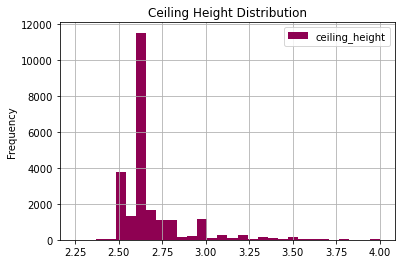

In [59]:
data.plot(y = 'ceiling_height', kind = 'hist', bins=30, range = (2.25,4), title = 'Ceiling Height Distribution', grid = True, colormap='PiYG')

The histogram immediately catches the eye with a large peak around 2.6 meters, as this is most likely the standard ceiling height in typical buildings. Most of the value is in the range 2.4 - 3.25 meters. The smallest indicator is 1 meter, and the largest is 100 (which may be an error in filling out the data).

**Exploring the time needed to sell the apartment**

To reveal the sale time of an apartment, let's look at the distribution of the variable 'days_exposition', reflecting how many days the ad was posted (from its publication to withdrawal).

In [60]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Days Exposition Distribution'}, ylabel='Frequency'>

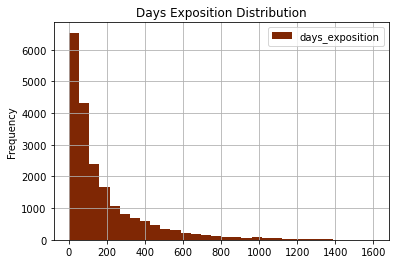

In [61]:
data.plot(y = 'days_exposition', kind = 'hist', bins=30, range = (0,1600), title = 'Days Exposition Distribution', grid = True, colormap='Oranges_r')


<AxesSubplot:>

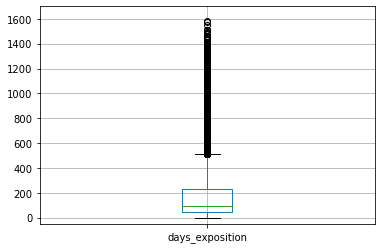

In [62]:
import matplotlib.pyplot as plt
plt.ylim(-50, 1700)

data.boxplot('days_exposition')

In order to explore the time of apartment sale, a histogram and boxplot were used. It can be seen on the histogram that the variable is distributed according to the Poisson distribution, as befits "temporary" variables. All values range from 0 days to 1600. The average value of selling days is 180, and the median is 95, which is quite different, what can be caused by outliers. 

Based on the quartiles data, everything that is included in the first quartile, that is, the time up to 45 days, can be considered as the "fast" time for the sale of an apartment. The sale of an apartment for more than 230 days (more than the third quartile) can be called “long”.

## Removing rare and outliers' values

Based on the data obtained above, it is not yet possible to identify specific outliers' values. But, if we look at the histogram,  a peak between values from 0 to 200 can be seen. Let's take a closer look at this interval:

<AxesSubplot:title={'center':'Days Exposition Distribution'}, ylabel='Frequency'>

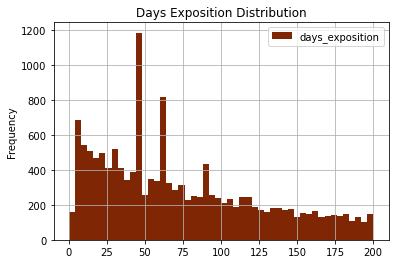

In [63]:
data.plot(y = 'days_exposition', kind = 'hist', bins=50, range = (0,200), title = 'Days Exposition Distribution', grid = True, colormap='Oranges_r')

Several peaks can be observed. To accurately determine them, let's look at the frequently encountered values:

In [64]:
data['days_exposition'].value_counts().head(5)

45.0    879
60.0    538
7.0     234
30.0    208
90.0    200
Name: days_exposition, dtype: int64

As can be seen, the outliers are presented by values of 7, 30, 45, 60 and 90 days, what represents a week, month, 1.5 months, 2 months and 3 months. This suggests that the publications could have been removed not because of the sale of the apartment, but for some regular technical reason.

For the accuracy of subsequent manipulations, it is necessary to get rid of these outliers, since they can significantly affect the distribution:

In [65]:
data_new = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')
print(data_new['days_exposition'].describe())

count    18335.000000
mean       195.709136
std        226.796685
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64


As can be seen from the description of the new dataset with corrected data (without outliers in 'days_exposition' variable), the average value has increased significantly and approached the median.

## What factors mostly affect the price of an apartment?

In order to answer the question about which factors are mostly associated with the cost of an apartment, the visualizations and the correlation coefficient will be applied.

But firstly, it is worth making a price slice of the data, as it was previously shown that there are several cases of very high apartment prices, which can distort the study of relationships. Therefore, let's create a new dataset with "cutted" data containing apartments with a cost of no more than 15 million RUB:

In [66]:
data_graph = data_new.query('last_price < 15000000.0')
data_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20331 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20331 non-null  int64         
 1   last_price            20331 non-null  float64       
 2   total_area            20331 non-null  float64       
 3   first_day_exposition  20331 non-null  object        
 4   rooms                 20331 non-null  int64         
 5   ceiling_height        20331 non-null  float64       
 6   floors_total          20331 non-null  int64         
 7   living_area           20331 non-null  float64       
 8   floor                 20331 non-null  int64         
 9   is_apartment          20331 non-null  bool          
 10  studio                20331 non-null  bool          
 11  open_plan             20331 non-null  bool          
 12  kitchen_area          20331 non-null  float64       
 13  balcony         

Having “cut off” a piece of data with apartments worth 15 million and below, we lost only about 5 thousand rows. In total, the new dataset contains 21360 observations. 

Now, on the basis of new dataset, we can begin to study the relationship of various characteristics of an apartment with its price

**1. Continuous variables: 'total_area' and 'CityCenters_nearest'**

These variables are continuous, so scatter plots and the Pearson correlation coefficient can be used to investigate their relationship with the price of an apartment.

Firsly, in order to identify outliers in a variable reflecting the area of an apartment, let's turn to Boxplot:

<AxesSubplot:>

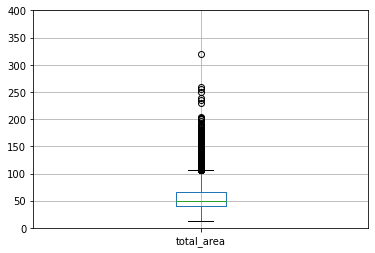

In [67]:
import matplotlib.pyplot as plt
plt.ylim(0, 400)

data_graph.boxplot('total_area')

As can be seen from the graph, the median apartment size is 50 square meters. Anything above about 100-105 square meters is considered an outlier. Therefore, we can "cut off" all unnecessary values above 100 square meters.

In [68]:
data_graph = data_graph.query('total_area < 100')

Also, let's look at the presence/absence of outliers in the variable 'cityCenters_nearest':

<AxesSubplot:>

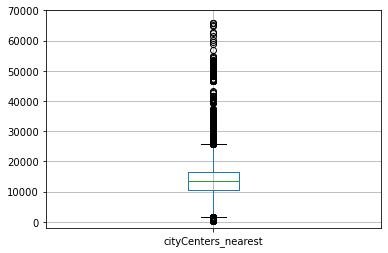

In [69]:
import matplotlib.pyplot as plt
plt.ylim(-2000, 70000)

data_graph.boxplot('cityCenters_nearest')

According to the graph, there is a fairly large number of outliers, but they will not interfere with the subsequent analysis, since they reflect the essence of the variable - the distance, which can be very small or very large. Therefore, no additional action is required with this variable.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

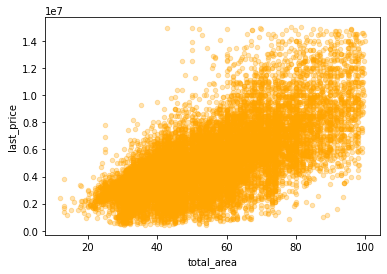

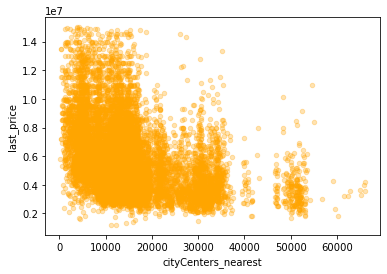

In [70]:
data_graph.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, color='orange')
data_graph.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', alpha = 0.3, color='orange')

In [71]:
data_graph[['last_price', 'total_area', 'cityCenters_nearest']].corr()

,last_price,total_area,cityCenters_nearest
last_price,1.000000,0.694719,-0.348754
total_area,0.694719,1.000000,-0.132550
cityCenters_nearest,-0.348754,-0.132550,1.000000


As can be seen from the data presented, there is indeed a connection between the price of an apartment and its total area: the larger the area, the higher the price. The correlation coefficient is about 0.7, which is a fairly significant indicator of the dependence of the two quantities under consideration. 

As for the second indicator - remoteness from the center - there is no relationship between the price of an apartment and this variable. If we interpret a negative correlation coefficient, it means that the shorter the distance to the center, the higher the price. But the value equal to 0.36 does not allow speaking about any dependence of the variables.

**2. Categorical and discrete variables: 'rooms', 'floor', 'weekday', 'month', 'year'**

As first step, let's check 'rooms' variable for outliers. 
Other variables: 'floor_group', 'weekday', 'month' and 'year' represent different categories. A check for outliers for these variables in such form does not seem necessary

Cheking 'rooms' variable for outliers:

<AxesSubplot:>

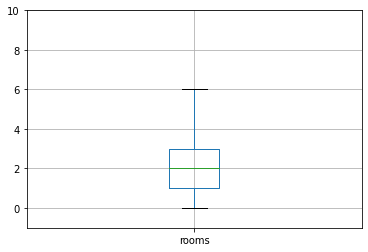

In [74]:
import matplotlib.pyplot as plt
plt.ylim(-1, 10)

data_graph.boxplot('rooms')

According to boxplot, there are no obvious outliers in the 'rooms' variable, so we can continue working with this variable further.

To analyze the relationship between categorical and discrete variables with the price of an apartment, it is firstly needed to group them by their median (or mean) value, which will allow to look at the relationship on the graphs.

**Rooms:**

In [75]:
# using pivot_table to group data
rooms_data = data_graph.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
rooms_data

,count,mean,median
,last_price,last_price,last_price
rooms,,,
0,165,2.889920e+06,2700000.0
1,7226,3.785415e+06,3600000.0
2,6988,5.192950e+06,4700000.0
3,4541,6.201721e+06,5750000.0
4,542,6.416142e+06,6325000.0
5,32,7.002812e+06,5800000.0
6,2,6.482000e+06,6482000.0


<AxesSubplot:title={'center':'Rooms Mean Value'}, xlabel='rooms'>

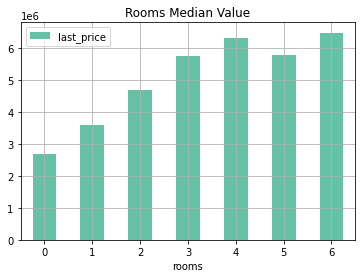

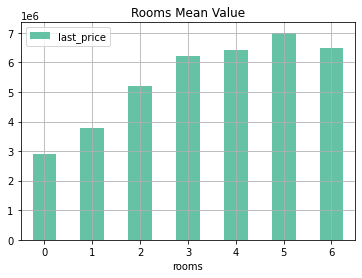

In [76]:
rooms_data.plot(y = 'median', title = 'Rooms Median Value', grid = True, kind = 'bar', colormap='Set2', rot=0)
rooms_data.plot(y = 'mean', title = 'Rooms Mean Value', grid = True, kind = 'bar', colormap='Set2', rot=0)

According to graphs, the general trend is that the more rooms, the higher the price. If we refer to the median value, then the most expensive are apartments with 4 and 6 rooms. According to the mean value of 'rooms' variable, the most expensive apartments are those with 5 rooms. 

**Floor:**

At its core, a floor variable is categorical. Therefore, for further manipulations with the data, there is need to group the data by floors: first, last and others for futher visualizations:

In [77]:
floor_data = data_graph.pivot_table(index = 'floor_group', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
floor_data

,count,mean,median
,last_price,last_price,last_price
floor_group,,,
first,2521,4.152918e+06,3850000.0
last,2681,4.541022e+06,4050000.0
other,14294,5.131608e+06,4600000.0


<AxesSubplot:title={'center':'Floor Group'}, xlabel='floor_group'>

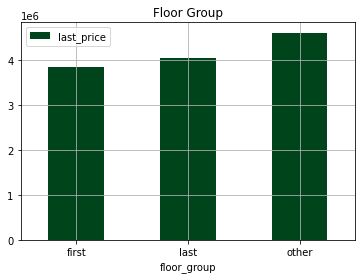

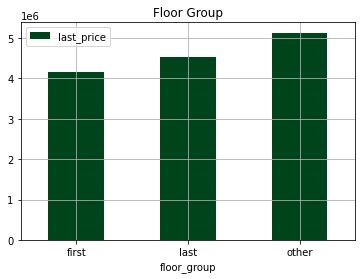

In [78]:
floor_data.plot(y = 'median', title = 'Floor Group', grid = True, kind = 'bar', colormap='PRGn_r', rot=0)
floor_data.plot(y = 'mean', title = 'Floor Group', grid = True, kind = 'bar', colormap='PRGn_r', rot=0)

As can be seen from the mean and median values, as well as from the graphs, the most expensive price is found for apartments on "other" floors, that is, not the first and not the last (4 million 600 thousand RUB). The lowest price is for apartments on the first floor (3 million 800 thousand RUB), and on the top floor - the average price (4 million 100 thousand RUB).

**Weekday:**

Let's start by grouping the data by the days of the week the ad is published:

In [79]:
week_data = data_graph.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
week_data

,count,mean,median
,last_price,last_price,last_price
weekday,,,
0,2988,4.942691e+06,4450000.0
1,3452,4.961202e+06,4500000.0
2,3226,4.952739e+06,4500000.0
3,3521,4.967421e+06,4400000.0
4,3345,4.878423e+06,4380000.0
5,1587,4.794920e+06,4400000.0
6,1377,4.869049e+06,4400000.0


<AxesSubplot:title={'center':'Weekday Mean'}, xlabel='weekday'>

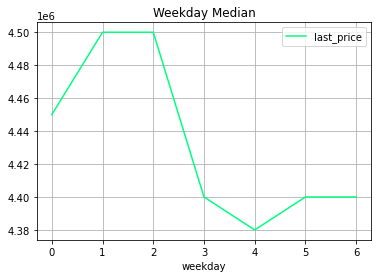

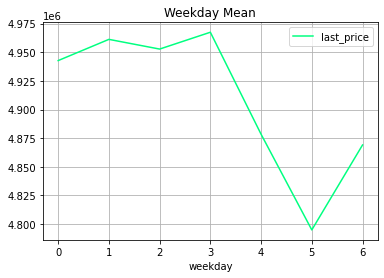

In [80]:
week_data.plot(y = 'median', title = 'Weekday Median', grid = True, colormap='winter_r')
week_data.plot(y = 'mean',  title = 'Weekday Mean', grid = True, colormap='winter_r')

According to the information about the days of the week, not everything is so unambiguous, since the data on the arithmetic mean and median are quite different. In general, for both indicators, one can notice a decrease in the cost of prices by the weekend, namely on Saturday. The average price rises slightly on Sunday, but not significantly. The highest price is for announcements published on Tuesday and Wednesday.

**Month:**

In [81]:
month_data = data_graph.pivot_table(index = 'month', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
month_data

,count,mean,median
,last_price,last_price,last_price
month,,,
1,1188,4.959615e+06,4500000.0
2,2143,4.958914e+06,4450000.0
3,2178,4.928662e+06,4494500.0
4,2040,5.007802e+06,4550000.0
5,1049,4.906671e+06,4400000.0
6,1438,4.746764e+06,4250000.0
7,1346,4.818007e+06,4300000.0
8,1442,4.935510e+06,4392500.0


<AxesSubplot:title={'center':'Month Mean'}, xlabel='month'>

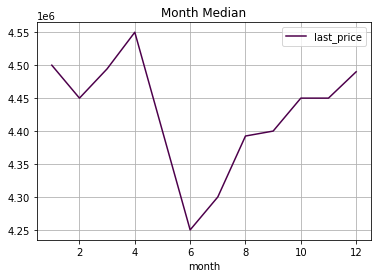

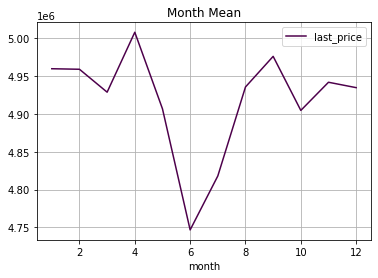

In [82]:
month_data.plot(y = 'median', title = 'Month Median', grid = True, colormap='BuPu_r')
month_data.plot(y = 'mean',  title = 'Month Mean', grid = True, colormap='BuPu_r')

If we consider the month of the ad's publication, then the lowest price is observed in June - the median price = 4 million 200 thousand RUB. Peaks in price can be observed in April - up to 4 million 610 thousand RUB and in September - up to 4 million 500 thousand RUB.

**Year:**

In [83]:
year_data = data_graph.pivot_table(index = 'year', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
year_data

,count,mean,median
,last_price,last_price,last_price
year,,,
2014,93,6.307486e+06,5650000.0
2015,971,5.233377e+06,4800000.0
2016,2333,4.840158e+06,4300000.0
2017,6751,4.799298e+06,4290000.0
2018,6856,4.882320e+06,4450000.0
2019,2492,5.281563e+06,4900000.0


<AxesSubplot:title={'center':'Year Mean'}, xlabel='year'>

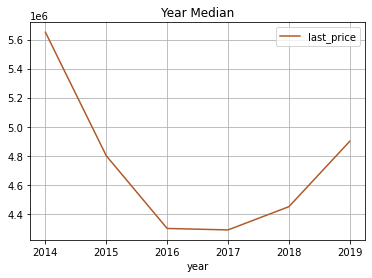

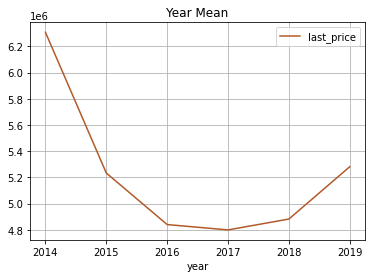

In [84]:
year_data.plot(y = 'median', title = 'Year Median', grid = True, colormap='Paired_r')
year_data.plot(y = 'mean',  title = 'Year Mean', grid = True, colormap='Paired_r')

As for the year of publication, the most expensive apartment prices were observed in 2014 and 2015: 6 and 5 million RUB, respectively. Then, by 2016-2107, there is a strong decline in prices, reaching a value of 4 million 300 thousand RUB. By 2019, the median price began to rise and reached values of almost 4 million 900 thousand RUB.

## Research of settlements with the largest number of ads

To begin with, let's sort the data by settlement to find out the number of ads in each, as well as the average price per square meter:

In [85]:
locality_table = data_new.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = ['count', 'median', 'mean'])
locality_table.columns = ['count', 'median', 'mean']
locality_table.head(5)

,count,median,mean
locality_name,,,
Aro village,3,50853.242321,51412.421933
Batovo village,8,30036.071032,30626.242755
Begunitsa village,13,37681.159420,37275.883670
Belogorka village,11,34090.909091,34358.668729
Boksitogorsk,11,16112.903226,17513.790766


Selecting 10 settlements with the largest number of ads:

In [86]:
locality_top_10 = locality_table.sort_values(by = 'count', ascending = False).head(10)
locality_top_10

,count,median,mean
locality_name,,,
Saint Petersburg,14426,104838.709677,115025.127312
village Murino,504,85668.819086,85464.250726
Shushary village,390,76876.172608,78802.541028
Vsevolozhsk,364,65594.697751,68697.075165
Pushkin,345,100000.000000,103704.260452
Kolpino,303,75000.000000,75741.213694
village Pargolovo,286,92202.380952,90520.977614
Gatchina,280,67180.706522,68304.224329
the village of Kudrovo,265,91803.278689,92234.338086


In [87]:
max_price = locality_top_10['mean'].max()
print('Highest price per square meter:', max_price)

Highest price per square meter: 115025.12731190899


In [88]:
min_price = locality_top_10['mean'].min()
print('Lowest price per square meter:', min_price)

Lowest price per square meter: 58207.82103142515


The highest average price per square meter is in St. Petersburg: 115,161 RUB. Of the top 10, the cheapest price per square meter in Vyborg is almost 58,000 RUB.

## Conclusion

Based on the data provided, an analysis was carried out to further determine the market price of the apartments. In order to further build an automated system for tracking anomalies and fraudulent activity, several tasks were completed:

1. Missing values were found in the variables 'balcony', 'ceiling heigh', 'is_apartment', 'kitchen_area', 'living_area', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'floors_total' и 'locality_name'. In some of them, the missing values were filled in according to the available data.

2. Data types have been changed for some variables in order to simplify subsequent analysis.

3. New variables have been added to the dataset:
- price per square meter - 'price_per_meter'
- the day of the ad publication - 'weekday'
- month of the ad publication - 'month'
- year of the ad publication - 'year'
- apartment floor category - 'floor_group' - which takes three possible values: first, last and other
- the ratio of living area to total area - 'living_total'
- the ratio of kitchen area to the total area - 'kitchen_total'

4. Exploratory data analysis was carried out:
- the parameters of the total area, the price, the number of rooms and the height of the ceilings were studied, as well as histograms were built to study the distribution of data
- the time of the sale of the apartment has been studied
- factors that can affect the price of an apartment were studies. As a result of the analysis, it was revealed that the indicators of the area and the number of rooms in the apartment have the greatest influence on ots price.

5. An analysis of indicators was carried out in 10 settlements with the largest number of ads: St. Petersburg, Murino village, Shushary village, Vsevolozhsk, Pushkin, Kolpino, Pargolovo village, Gatchina, Kudrovo village and Vyborka. It was revealed that the highest price per square meter is in St. Petersburg, and the lowest (from the top 10 list) is in Vyborg.

If we talk in more detail about the factors associated with the price of apartments, the research analysis carried out allowed us to identify the following patterns:
    
1. The total area of an apartment greatly affects its cost: the larger the area, the more expensive the apartment;
    
2. The number of rooms also has an effect: the more rooms, the higher the cost of the apartment. The most expensive are apartments with 4-6 rooms;
    
3. Remoteness from the center does not affect the cost of the apartment;
    
4. Floor affects the cost of an apartment: apartments not on the first and not on the last floors are more expensive;
    
5. As for the date of publication of the announcement: the cheapest apartments are from the announcements published on Thursday and in July. The most expensive apartments were in the announcements of September. In 2017, there was a sharp drop in apartment prices, and in 2019 prices began to rise again.